In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

In [3]:
# ustawienie widoku jaka w notebooku, aby wykresy i czcionki były czytelne
sns.set_context("notebook")

#Wczytanie Breast Cancer Wisconsin (Diagnostic) z sklearn

In [4]:
data = load_breast_cancer(as_frame=True)
df = data.frame.copy()

Wyświetlamy kolumny - patrzymy co mamy w danych

In [5]:
list(df.columns)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'target']

Tworzymy nową kolumnę na bazie target

In [6]:
df["diagnosis"] = df["target"].map({0: "M", 1: "B"})
list(df.columns)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'target',
 'diagnosis']

Wybieramy podzbiór kolumn do analizy

In [7]:
cols = ["diagnosis", "mean radius", "mean texture", "mean area", "mean smoothness", "mean compactness"]
df_small = df[cols].rename(columns={
    "mean radius": "radius_mean",
    "mean texture": "texture_mean",
    "mean area": "area_mean",
    "mean smoothness": "smoothness_mean",
    "mean compactness": "compactness_mean"
})

df_small.head()

,diagnosis,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean
0,M,17.99,10.38,1001.0,0.11840,0.27760
1,M,20.57,17.77,1326.0,0.08474,0.07864
2,M,19.69,21.25,1203.0,0.10960,0.15990
3,M,11.42,20.38,386.1,0.14250,0.28390
4,M,20.29,14.34,1297.0,0.10030,0.13280


#Zapoznanie z danymi

In [8]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   diagnosis         569 non-null    object 
 1   radius_mean       569 non-null    float64
 2   texture_mean      569 non-null    float64
 3   area_mean         569 non-null    float64
 4   smoothness_mean   569 non-null    float64
 5   compactness_mean  569 non-null    float64
dtypes: float64(5), object(1)
memory usage: 26.8+ KB


In [9]:
df_small.describe(include="all")

,diagnosis,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean
count,569,569.000000,569.000000,569.000000,569.000000,569.000000
unique,2,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.127292,19.289649,654.889104,0.096360,0.104341
std,NaN,3.524049,4.301036,351.914129,0.014064,0.052813
min,NaN,6.981000,9.710000,143.500000,0.052630,0.019380
25%,NaN,11.700000,16.170000,420.300000,0.086370,0.064920
50%,NaN,13.370000,18.840000,551.100000,0.095870,0.092630
75%,NaN,15.780000,21.800000,782.700000,0.105300,0.130400


In [10]:
df_small["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

Pytania:
- Ile obserwacji mamy w każdej klasie?

- Która zmienna ma największą skalę?

- Która ma najmniejszą rozpiętość?

Szybkie porównanie skal

In [11]:
df_small.drop(columns=["diagnosis"]).agg(["min", "median", "max"]).T.sort_values("max", ascending=False)


,min,median,max
area_mean,143.50000,551.10000,2501.0000
texture_mean,9.71000,18.84000,39.2800
radius_mean,6.98100,13.37000,28.1100
compactness_mean,0.01938,0.09263,0.3454
smoothness_mean,0.05263,0.09587,0.1634


#Ten sam problem → różne wykresy

Wybieramy zmienną

In [12]:
x = "radius_mean"


###Wykres 1 - histogram + KDE (Kernel Density Estimation)

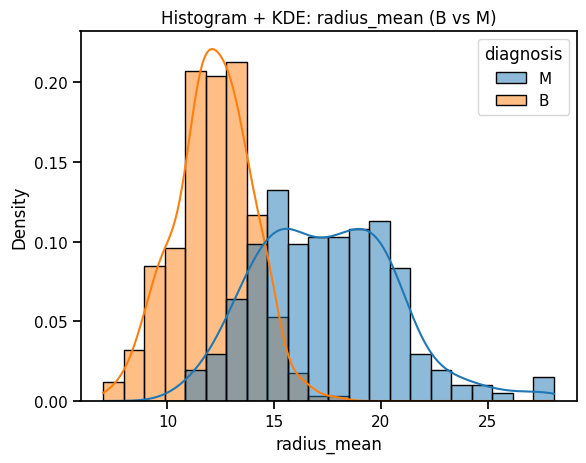

In [13]:
plt.figure()
sns.histplot(data=df_small, x=x, hue="diagnosis", kde=True, stat="density", common_norm=False)
plt.title("Histogram + KDE: radius_mean (B vs M)")
plt.xlabel("radius_mean")
plt.ylabel("Density")
plt.show()


Pytania:
- Czy na podstawie tego wykresu umiesz powiedzieć, która grupa jest większa?

- Czy dobór binów może zmienić wniosek?

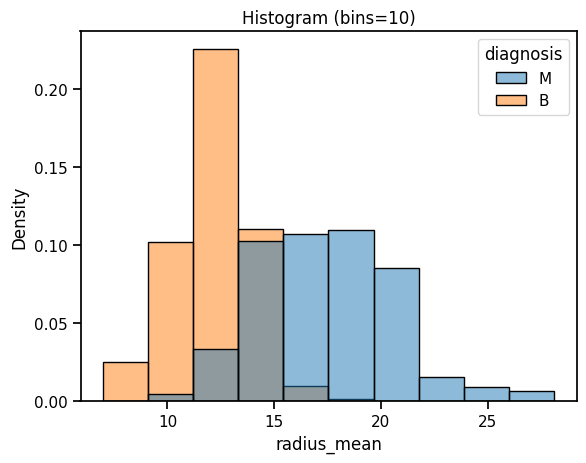

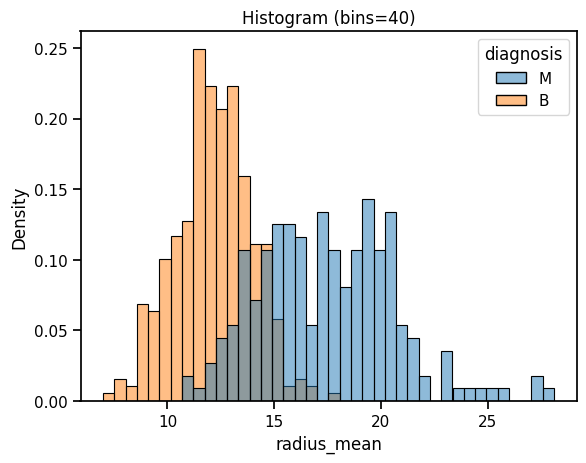

In [14]:
plt.figure()
sns.histplot(data=df_small, x=x, hue="diagnosis", bins=10, stat="density", common_norm=False)
plt.title("Histogram (bins=10)")
plt.show()

plt.figure()
sns.histplot(data=df_small, x=x, hue="diagnosis", bins=40, stat="density", common_norm=False)
plt.title("Histogram (bins=40)")
plt.show()

###Wykres 2 - boxplot (wykres pudełkowy, wykres ramka-wąsy)

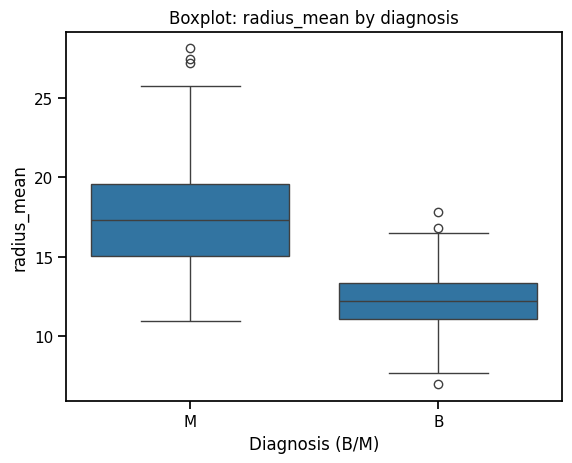

In [15]:
plt.figure()
sns.boxplot(data=df_small, x="diagnosis", y=x)
plt.title("Boxplot: radius_mean by diagnosis")
plt.xlabel("Diagnosis (B/M)")
plt.ylabel("radius_mean")
plt.show()


Pytanie:
- Czego tu nie widać?

###Wykres 3 - violin plot (wykres skrzypcowy)

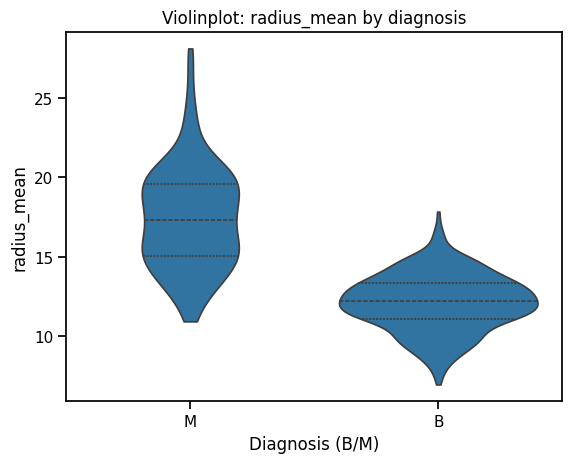

In [16]:
plt.figure()
sns.violinplot(data=df_small, x="diagnosis", y=x, inner="quartile", cut=0)
plt.title("Violinplot: radius_mean by diagnosis")
plt.xlabel("Diagnosis (B/M)")
plt.ylabel("radius_mean")
plt.show()


Pytanie:
- Czy violinplot jest zawsze lepszy od boxplota? Kiedy może być mylący?

###Wykres 4 - stripplot (wykres punktowy jednowymiarowy, wykres pasmowy)

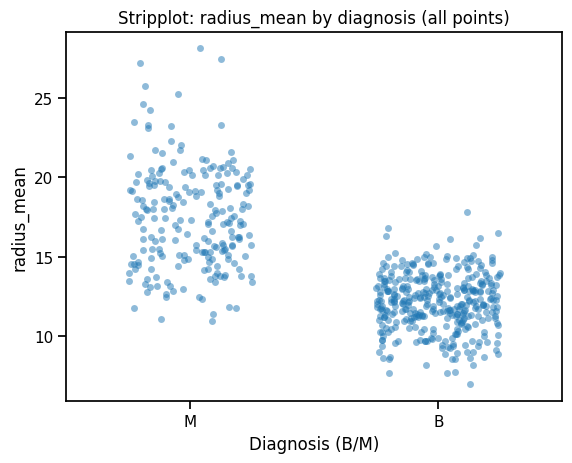

In [17]:
plt.figure()
sns.stripplot(data=df_small, x="diagnosis", y=x, jitter=0.25, alpha=0.5)
plt.title("Stripplot: radius_mean by diagnosis (all points)")
plt.xlabel("Diagnosis (B/M)")
plt.ylabel("radius_mean")
plt.show()


Pytanie:
- Teraz widzimy dane. Czy rozkłady się nachodzą? Czy to przeszkadza w interpretacji?

##Jaki wykres powie nam najwięcej?

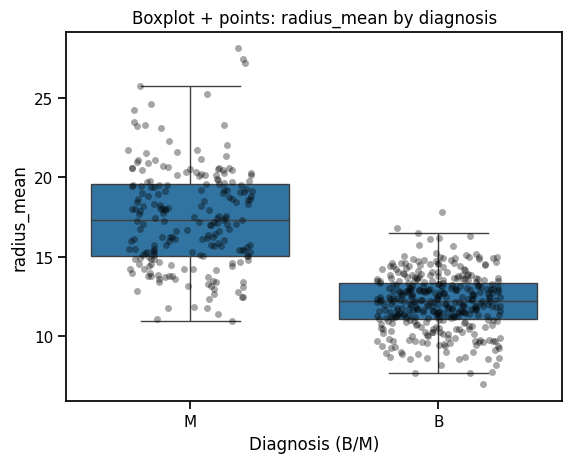

In [18]:
plt.figure()
sns.boxplot(data=df_small, x="diagnosis", y=x, showfliers=False)
sns.stripplot(data=df_small, x="diagnosis", y=x, jitter=0.25, alpha=0.35, color="black")
plt.title("Boxplot + points: radius_mean by diagnosis")
plt.xlabel("Diagnosis (B/M)")
plt.ylabel("radius_mean")
plt.show()


# Problem skali i ogona

In [19]:
x = "area_mean"

###Histogram w skali liniowej

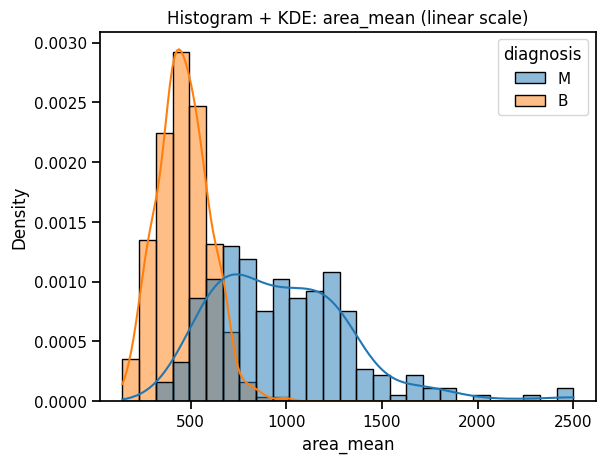

In [20]:
plt.figure()
sns.histplot(data=df_small, x=x, hue="diagnosis", kde=True, stat="density", common_norm=False)
plt.title("Histogram + KDE: area_mean (linear scale)")
plt.xlabel("area_mean")
plt.ylabel("Density")
plt.show()


Ta sama rzeczy tylko w skali logarytmicznej

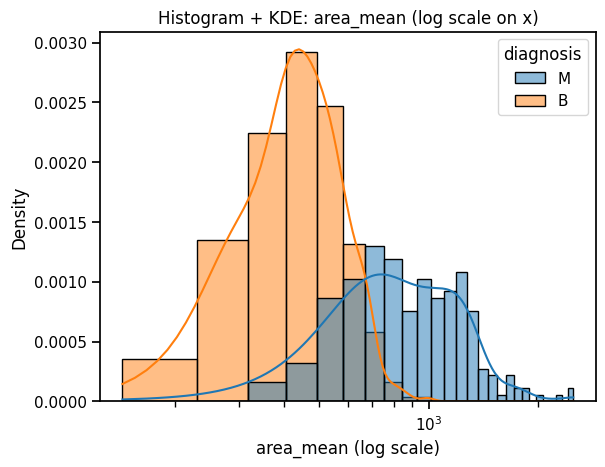

In [21]:
plt.figure()
sns.histplot(data=df_small, x=x, hue="diagnosis", kde=True, stat="density", common_norm=False)
plt.xscale("log")
plt.title("Histogram + KDE: area_mean (log scale on x)")
plt.xlabel("area_mean (log scale)")
plt.ylabel("Density")
plt.show()


Pytanie:
- Czy zmiana skali to manipulacja?

#Wykres może kłamać: ucięta oś i efekt "na siłę"


In [22]:
x = "smoothness_mean"


###Uczciwy wykres

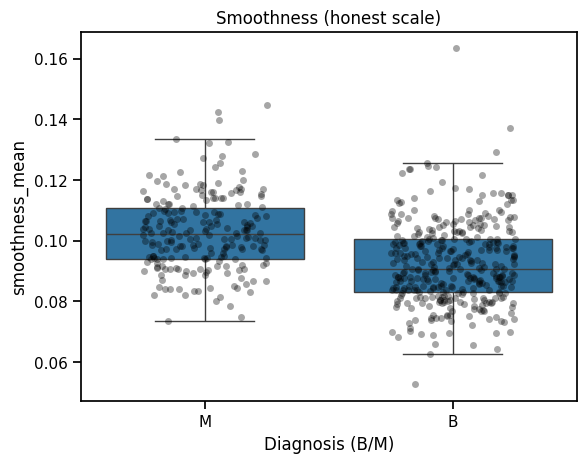

In [23]:
plt.figure()
sns.boxplot(data=df_small, x="diagnosis", y=x, showfliers=False)
sns.stripplot(data=df_small, x="diagnosis", y=x, jitter=0.25, alpha=0.35, color="black")
plt.title("Smoothness (honest scale)")
plt.xlabel("Diagnosis (B/M)")
plt.ylabel("smoothness_mean")
plt.show()


###Ten sam wykres z uciętą osią

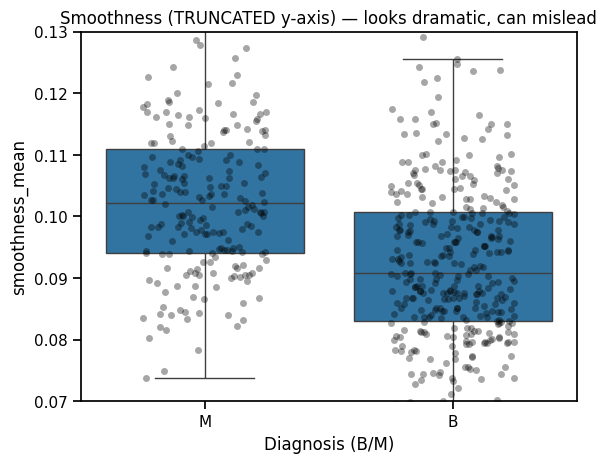

In [24]:
plt.figure()
sns.boxplot(data=df_small, x="diagnosis", y=x, showfliers=False)
sns.stripplot(data=df_small, x="diagnosis", y=x, jitter=0.25, alpha=0.35, color="black")
plt.ylim(0.07, 0.13)  # celowo zawężamy zakres
plt.title("Smoothness (TRUNCATED y-axis) — looks dramatic, can mislead")
plt.xlabel("Diagnosis (B/M)")
plt.ylabel("smoothness_mean")
plt.show()


Pytanie:
- Technicznie poprawne — merytorycznie podejrzane. Jak to rozpoznać na cudzym wykresie?

#Jak zatem przygotować dobry wykres?

- tytuł jako pytanie
- podane n
- czytelność

###1. Obliczmy n i krótką statystykę

In [25]:
summary = df_small.groupby("diagnosis")[x].agg(["count", "median", "mean", "std"])
summary


,count,median,mean,std
diagnosis,,,,
B,357,0.09076,0.092478,0.013446
M,212,0.10220,0.102898,0.012608


###Finalny wykres, z którego dużo wyczytamy

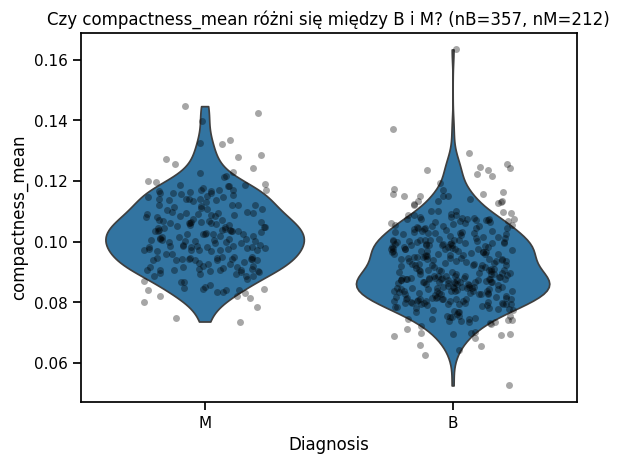

In [26]:
plt.figure()
sns.violinplot(data=df_small, x="diagnosis", y=x, inner=None, cut=0)
sns.stripplot(data=df_small, x="diagnosis", y=x, jitter=0.25, alpha=0.35, color="black")

nB = int(summary.loc["B", "count"])
nM = int(summary.loc["M", "count"])

plt.title(f"Czy compactness_mean różni się między B i M? (nB={nB}, nM={nM})")
plt.xlabel("Diagnosis")
plt.ylabel("compactness_mean")
plt.show()


Pytanie:
- Co byś napisał/a w 1 zdaniu pod tym wykresem (bez statystyki)?

# A może automatycznie zrobić przegląd danych?

In [28]:
def quick_viz_checklist(df, group_col, value_col):
    print("Pytanie badawcze:")
    print(f"  Czy {value_col} różni się między grupami w {group_col}?")
    print("\nSzybki przegląd danych:")
    print(df[[group_col, value_col]].isna().sum())
    print(df[group_col].value_counts())
    print(df[value_col].describe())

quick_viz_checklist(df_small, "diagnosis", "radius_mean")


Pytanie badawcze:
  Czy radius_mean różni się między grupami w diagnosis?

Szybki przegląd danych:
diagnosis      0
radius_mean    0
dtype: int64
diagnosis
B    357
M    212
Name: count, dtype: int64
count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64
